In [1]:
# imports
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
# Terms of five bonds are given below
years = [1, 3, 5, 7, 10] # number of years
coupons = [4.125, 5.125, 6.125, 7.125, 8.0]  # in percent
prices = [103, 103.5, 112.5, 116, 118]
# all bonds are semi annual coupon paying bonds with notional of 100.0

### Steps
* Write a Bond class that takes coupon, frequency, maturity, notional to construct a bond.
* Generate bond Cashflows
* This class should have function to calculate PV given an interest rate
* Write another class with objective function
* Run Bisection, Secant and Newton solver, Plot error function.
* calculate YTM for the above bonds using solvers you have implemented. Make sure YTM is form each of the methods matches.


### Hints
* Remember Bond cash flow for semi annual bond per period is 1/2 of coupon * notional and last payment also has additional notional.
* PV of a bond is sum of presnt value of each cashflow.

In [3]:
class Bond:
    def __init__(self, coupon,maturity, notional=100, frequency=2):
        #The coupon is used to calculate the interest we will get paid every time
        self.coupon=coupon
        #How many times we get paid in an year
        self.frequency = frequency
        #Time to maturity of the bond
        self.maturity = maturity
        #The principal for the bond
        self.notional=notional
        #The different amounts we get paid, calculated using coupon and the notional
        self.cashflow=[]
        #As per given, all cashflows are going to be equal, we know length to be maturity*frequency
        #except for the last, as it will have the notional.
        nop=self.maturity*self.frequency
        for i in range(0,nop):
                self.cashflow.append((self.notional*self.coupon)/(100*self.frequency))
        self.cashflow[-1]=self.cashflow[-1]+self.notional
    #given a rate of interest or an array of rates of interest we calculate present value by discounting
    def pv(self, rate):
        summation=0
        discount=1
        #If only a single rate is given
        try:
            for i in range(0,len(self.cashflow)):
                discount=discount*(1+(rate/(100*self.frequency)))
                summation=summation+self.cashflow[i]/discount
        #If array of rates in given
        except:
            for i in range(0,len(self.cashflow)):
                discount=(1+(rate[i]/(100*self.frequency)))**(i+1)
                summation=summation+self.cashflow[i]/discount
        return(summation)

In [25]:
class EquationSolver:
    #life will be easy if we know the bond for which to calculate
    def __init__(self, b, target):
        self.bond=b
        self.numiter=0
        self.error = []
        self.target = target
        
    def objectiveFunction(self, x):
        self.numiter += 1
        summation=0
        self.error.append(self.bond.pv(x)-self.target)
        return self.bond.pv(x)-self.target
    
    def derivative(self, x):
#        summation=0
#        discount=self.bond.frequency*(1+x/self.bond.frequency)
#        for i in range(len(self.bond.cashflow)):
#            discount=discount*(1+x/self.bond.frequency)
#            summation=summation -((i+1)* self.bond.cashflow[i])/discount
        summation=(self.bond.pv(x)-self.bond.pv(x-0.00001))/0.00001
        return summation

1.10022 is value of x where f(x) = 103, it was found in 3 iterations
3
3.87789 is value of x where f(x) = 103, it was found in 5 iterations
5
3.38633 is value of x where f(x) = 112, it was found in 5 iterations
5
4.44058 is value of x where f(x) = 116, it was found in 5 iterations
5
5.62229 is value of x where f(x) = 118, it was found in 5 iterations
5


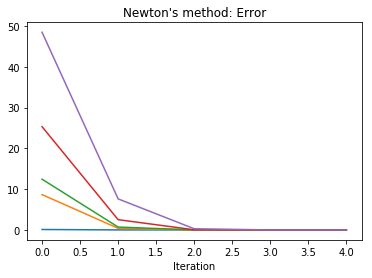

In [26]:
#The newtons Solver, most of the code is copied from the solver notebook
for i in range(5):
    eqSolver = EquationSolver(Bond(coupons[i], years[i]),prices[i])
    try:
        root = optimize.newton(eqSolver.objectiveFunction, 1, fprime=eqSolver.derivative, tol=1e-9, maxiter=500)
        print('%.5f is value of x where f(x) = %.2d, it was found in %d iterations' % (root, prices[i], eqSolver.numiter))
        print(len(eqSolver.error))
        x = np.arange(len(eqSolver.error))
        plt.plot(x, eqSolver.error, '-')
        plt.title("Newton's method: Error")
        plt.xlabel("Iteration")
    except ValueError as err:
        print (err)

1.10022 is value of x where f(x) = 103, it was found in 5 iterations
5
3.87789 is value of x where f(x) = 103, it was found in 7 iterations
7
3.38633 is value of x where f(x) = 103, it was found in 7 iterations
7
4.44058 is value of x where f(x) = 103, it was found in 7 iterations
7
5.62229 is value of x where f(x) = 103, it was found in 8 iterations
8


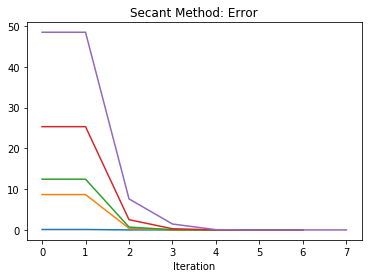

In [27]:
#The Secant Solver, most of the code is copied from the solver notebook
from scipy import optimize
for i in range(5):
    eqSolver = EquationSolver(Bond(coupons[i], years[i]),prices[i])
    try:
        root = optimize.newton(eqSolver.objectiveFunction, 1, tol=1e-9, maxiter=100)
        print('%.5f is value of x where f(x) = %.2d, it was found in %d iterations' % (root, prices[0], eqSolver.numiter))
        print(len(eqSolver.error))
        x = np.arange(len(eqSolver.error))
        plt.plot(x, eqSolver.error, '-')
        plt.title('Secant Method: Error')
        plt.xlabel('Iteration')
    except ValueError as err:
        print (err)

(1.1002223618561402,       converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 1.1002223618561402)
1.10022 is value of x where f(x) = 103, it was found in 36 iterations
(3.8778929400723428,       converged: True
           flag: 'converged'
 function_calls: 35
     iterations: 33
           root: 3.8778929400723428)
3.87789 is value of x where f(x) = 103, it was found in 35 iterations
(3.3863293484319,       converged: True
           flag: 'converged'
 function_calls: 35
     iterations: 33
           root: 3.3863293484319)
3.38633 is value of x where f(x) = 112, it was found in 35 iterations
(4.440582947572693,       converged: True
           flag: 'converged'
 function_calls: 35
     iterations: 33
           root: 4.440582947572693)
4.44058 is value of x where f(x) = 116, it was found in 35 iterations
(5.622287626611069,       converged: True
           flag: 'converged'
 function_calls: 35
     iterations: 33
           root: 5.62

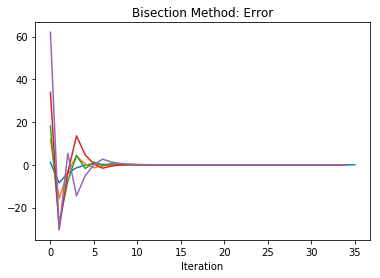

In [28]:

#The Bisection Solver, most of the code is copied from the solver notebook
for i in range(5):
    eqSolver = EquationSolver(Bond(coupons[i], years[i]),prices[i])
    try:
        root = optimize.bisect(eqSolver.objectiveFunction, 0, 10, xtol=1e-9, rtol=1e-10, maxiter=100, full_output=True)
        print(root)
        print('%.5f is value of x where f(x) = %.2d, it was found in %d iterations' % (root[0], prices[i], eqSolver.numiter))
        x = np.arange(len(eqSolver.error))
        plt.plot(x, eqSolver.error, '-')
        plt.title('Bisection Method: Error')
        plt.xlabel('Iteration')
    except ValueError as err:
        print (err)

1.10022 is value of x where f(x) = 103, it was found in 6 iterations
6
3.87789 is value of x where f(x) = 103, it was found in 8 iterations
8
3.38633 is value of x where f(x) = 103, it was found in 8 iterations
8
4.44058 is value of x where f(x) = 103, it was found in 8 iterations
8
5.62229 is value of x where f(x) = 103, it was found in 8 iterations
8


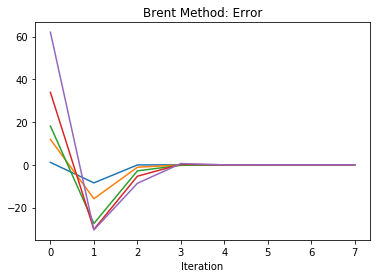

In [8]:
#The Brents Solver, most of the code is copied from the solver notebook
for i in range(5):
    eqSolver = EquationSolver(Bond(coupons[i], years[i]),prices[i])
    try:
        root = optimize.brentq(eqSolver.objectiveFunction, 0, 10, xtol=1e-9, rtol=1e-10, maxiter=100, full_output=True)
        print('%.5f is value of x where f(x) = %.2d, it was found in %d iterations' % (root[0], prices[0], eqSolver.numiter))
        print(len(eqSolver.error))
        x = np.arange(len(eqSolver.error))
        plt.plot(x, eqSolver.error, '-')
        plt.title('Brent Method: Error')
        plt.xlabel('Iteration')

    except ValueError as err:
        print (err)